In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv('/content/height-weight.csv')


In [8]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


In [11]:
df.isnull().sum()

,0
Weight,0
Height,0


Text(0, 0.5, 'Weight')

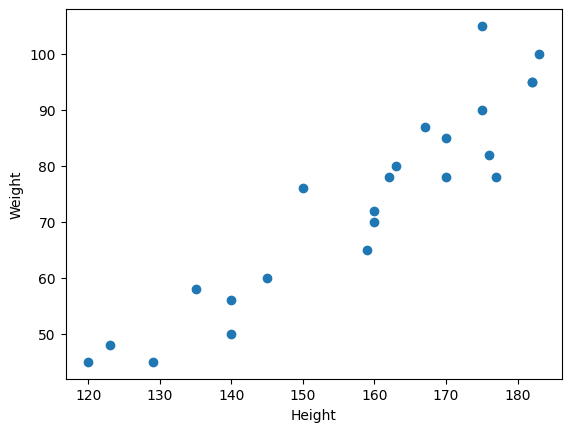

In [12]:
#scatter plot
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

In [13]:
#correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


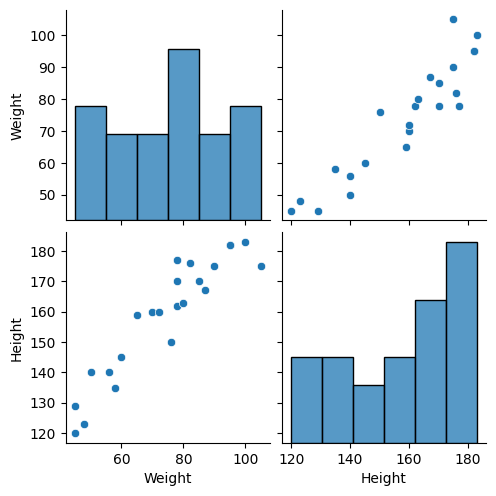

In [15]:
##seaborn for visualization
import seaborn as sns

sns.pairplot(df)

In [19]:
x=df[["Weight"]]
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [20]:
y=df[["Height"]]
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

    Weight
1       58
13     100
22      72
16      50
8       95
6       80
17      65
4       70
2       48
5       78
18      76
9       78
7       90
19      87
3       60
0       45
15      78
12     105
    Weight
11      95
10      82
21      56
14      85
20      45
    Height
1      135
13     183
22     160
16     140
8      182
6      163
17     159
4      160
2      123
5      162
18     150
9      170
7      175
19     167
3      145
0      120
15     177
12     175
    Height
11     182
10     176
21     140
14     170
20     129


In [25]:
x_train.shape

(18, 1)

In [28]:
##standardization
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [27]:
x_train

array([[-0.94784251],
       [ 1.5145937 ],
       [-0.12703044],
       [-1.41687798],
       [ 1.22144653],
       [ 0.34200503],
       [-0.53743647],
       [-0.24428931],
       [-1.53413685],
       [ 0.22474616],
       [ 0.10748729],
       [ 0.22474616],
       [ 0.92829937],
       [ 0.75241106],
       [-0.83058364],
       [-1.71002515],
       [ 0.22474616],
       [ 1.80774087]])

In [29]:
x_test

array([[ 1.18679765],
       [ 0.49803116],
       [-0.87950183],
       [ 0.65697727],
       [-1.46230425]])

In [30]:
from sklearn.linear_model import LinearRegression

regression =LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

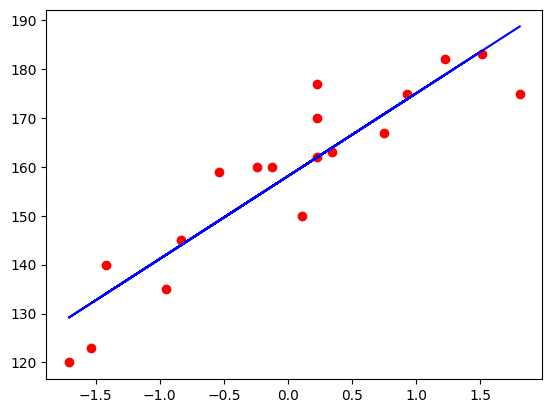

In [33]:
#plot training data plot best fit line
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regression.predict(x_train),color='blue')


In [34]:
#prediction for test data

y_pred=regression.predict(x_test)
y_pred

array([[178.19948261],
       [166.54105272],
       [143.22419295],
       [169.23145962],
       [133.35936766]])

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 26.781155385322734
Mean Absolute Error: 4.322313131609081
Root Mean Squared Error: 5.1750512447049966
